
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W10/W10P2.ipynb)




In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import scipy

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W10/USDTRY=X.csv"
  res = requests.get(url, allow_redirects=True)
  with open('USDTRY=X.csv','wb') as file:
    file.write(res.content)

download_data()  

In [ ]:
data = pd.read_csv("USDTRY=X.csv")["Close"]

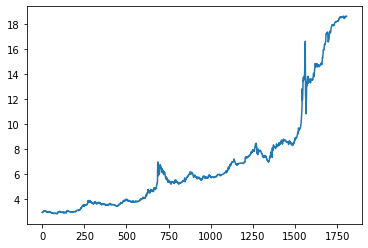

In [ ]:
plt.plot(data)

In [ ]:
data = data.interpolate()

In [ ]:
log_ = lambda x: np.log(x+1)

In [ ]:
data = data.apply(log_)

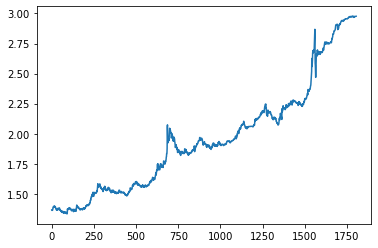

In [ ]:
plt.plot(data)

In [ ]:
data

0       1.364910
1       1.362360
2       1.362207
3       1.366115
4       1.364023
          ...   
1801    2.975560
1802    2.976147
1803    2.975989
1804    2.976896
1805    2.977012
Name: Close, Length: 1806, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(data)

(1.0399509815575358,
 0.9946700933504365,
 24,
 1781,
 {'1%': -3.43402700734663,
  '5%': -2.8631641942387542,
  '10%': -2.56763466996284},
 -10862.407853066483)

In [ ]:
data_ = data.diff()[1:]

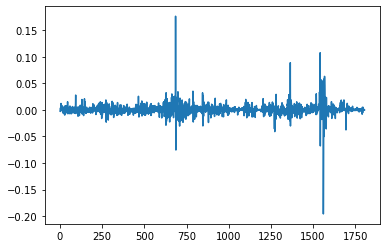

In [ ]:
plt.plot(data_)

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [ ]:
arma_order_select_ic(data_, max_ar = 4, max_ma = 4, trend = "nc")

C:\Users\hamsi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\hamsi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.e

{'bic':               0             1             2             3             4
 0           NaN -10988.636659 -10984.088697 -10978.331059 -10971.687039
 1 -10985.306629 -10983.176845 -10980.358045 -10972.979205 -10965.656923
 2 -10985.123910 -10980.244958 -10973.010444 -10965.444568 -10966.703179
 3 -10978.286998 -10972.936071 -10967.321755 -10959.835927 -10963.903435
 4 -10971.896272 -10966.036836 -10966.961977 -10958.636427 -10951.414197,
 'bic_min_order': (0, 1)}

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order = (0,1,1))
model = mod.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1806
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5501.775
Date:                Mon, 28 Nov 2022   AIC                         -10999.550
Time:                        14:07:10   BIC                         -10988.553
Sample:                             0   HQIC                        -10995.491
                               - 1806                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1326      0.006     20.539      0.000       0.120       0.145
sigma2         0.0001   6.49e-07    202.906      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            635969.97
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               6.08   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

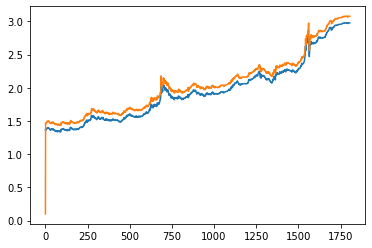

In [ ]:
plt.plot(data)
plt.plot(model.predict()+0.1)

In [ ]:
residuals = model.resid

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

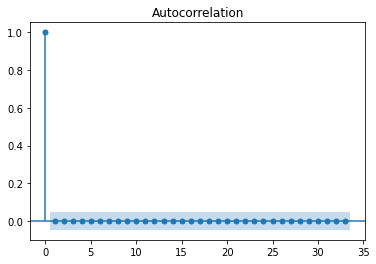

In [ ]:
plot_acf(np.square(residuals));

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
acorr_ljungbox(residuals, model_df = 1, return_df = True)

C:\Users\hamsi\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.011924,NaN
2,0.074980,0.784219
3,0.078120,0.961693
4,0.125860,0.988563
5,0.149622,0.997337
6,0.231416,0.998738
7,0.232535,0.999760
8,0.253654,0.999943
9,0.307000,0.999980
10,0.329016,0.999995


In [ ]:
acorr_ljungbox(np.square(residuals), model_df = 1, return_df = True, boxpierce = True)

C:\Users\hamsi\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.000005,NaN,0.000005,NaN
2,0.000006,0.998108,0.000006,0.998110
3,0.000006,0.999997,0.000006,0.999997
4,0.000006,1.000000,0.000006,1.000000
5,0.000006,1.000000,0.000006,1.000000
6,0.000006,1.000000,0.000006,1.000000
7,0.000007,1.000000,0.000007,1.000000
8,0.000010,1.000000,0.000010,1.000000
9,0.000017,1.000000,0.000017,1.000000
10,0.000018,1.000000,0.000018,1.000000


In [ ]:
statsmodels.stats.diagnostic.het_arch(residuals, nlags = 12) ####There is a little ARCH effect here!

(69.63607138085213,
 3.7464373191719934e-10,
 5.993603451438701,
 2.362401574395165e-10)